# Hermite Interpolation

In [1]:
using Plots
using Printf
using LinearAlgebra
using DataInterpolations

In [2]:
default(lw=2,markersize = 6,
    xtickfont=font(12), ytickfont=font(12), 
    guidefont=font(14), legendfont=font(12),titlefont=font(12))

## Example 1

In [3]:
f = x-> sin(x);
df = x-> cos(x);

# nodes
x = [0, 0.5, 3];
n = length(x)-1;

In [4]:
# set the extended nodes
z = zeros(2*n+2);
@. z[1:2:end] = x;
@. z[2:2:end] = x;

# build up the matrix of divided differences
F = zeros(2*n+2, 2*n+2);

# sest the first column
@. F[:,1] = f(z);

# loop over the rows beneath row 1
for i in 2:2*n+2
    
    # use modified rule for the first column
    if(i%2==0)
        F[i,2] =  df(z[i-1])
    else
        F[i,2] = (F[i,1] - F[i-1,1])/(z[i]-z[i-1])
    end
    # fill the rest of the columns in the usual way
    for j in 3:i
       F[i,j] = (F[i,j-1] - F[i-1,j-1])/(z[i] - z[i-(j-1)]) 
    end
    
end

a = diag(F);

In [5]:
display(F)

6×6 Matrix{Float64}:
 0.0        0.0        0.0         0.0        0.0        0.0
 0.0        1.0        0.0         0.0        0.0        0.0
 0.479426   0.958851  -0.0822978   0.0        0.0        0.0
 0.479426   0.877583  -0.162537   -0.160478   0.0        0.0
 0.14112   -0.135322  -0.405162   -0.080875   0.0265345  0.0
 0.14112   -0.989992  -0.341868    0.0253175  0.0353975  0.00295434

In [6]:
# estimate at a new values
xx = LinRange(0, 3, 100);
H = a[1] * ones(size(xx));

for i in 2:2*n+2
    ΔH = a[i] *ones(size(xx));
    for j in 1:i-1
        @. ΔH *= (xx - z[j]);
    end
    @. H += ΔH;
end


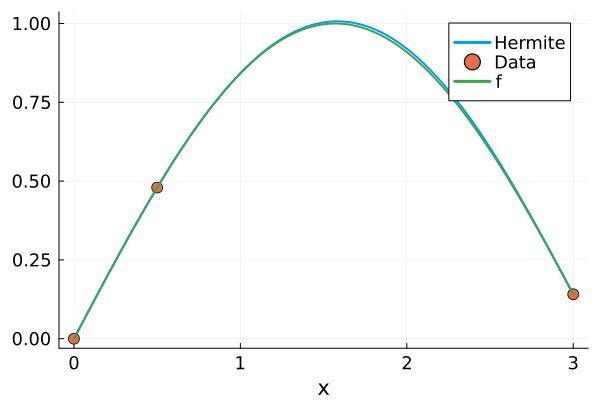

In [7]:
xx = LinRange(0, 3, 100);

plot(xx, H, label="Hermite")
scatter!(x, f.(x), label="Data")
plot!(xx, f.(xx),label="f")
xlabel!("x")

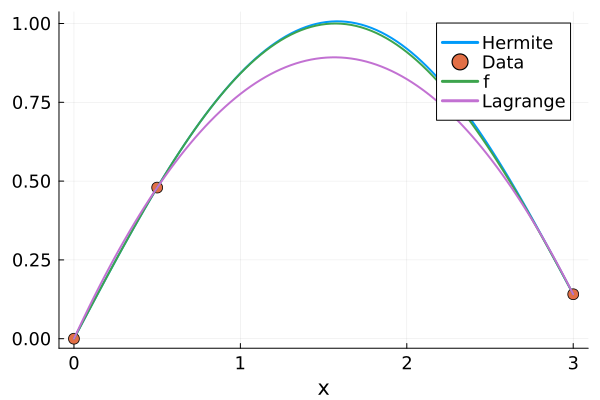

In [8]:
xx = LinRange(0, 3, 100);

P= LagrangeInterpolation(f.(x),x);
plot(xx, H, label="Hermite")
scatter!(x, f.(x), label="Data")
plot!(xx, f.(xx),label="f")
plot!(xx, P.(xx), label="Lagrange")
xlabel!("x")
